<a href="https://colab.research.google.com/github/PetersServers/Assignments/blob/main/homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following assignment consists again of a theoretical part (learning portfolio) and a practical part (assignment). The goal is to train a neural model from scratch, as we did a few weeks ago. I would like us to repeat the most important things so that we can consolidate our knowledge in this area, for this you will train a model on a dataset that I will provide via OLAT. 

The plan would be that in the first we will discuss your learnings from the theory part, that means you are relatively free to fill your Learning Portfolio on this topic and in the following week we will discuss your solutions of the Classification Model.

#Theory part (filling your Learning Portfolio, May 24)

In preparation for the practical part, I ask you to familiarize yourself with the following video sources in the next week:

1) Please watch the following video until random forests:

https://course.fast.ai/Lessons/lesson5.html

2) Please download the following notebooks and edit it in Google-Colab. Take notes and update your Learning Portfolio.

https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch

https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework

The contents should be mostly known to you, because these contents are also based on chapter 4, which we have already worked on. We repeat the basics again with a new data set to consolidate our knowledge.



#Practical part (Assignment, May 31)

The following task is a binary classification task. The first column is our target. All variables are categorical variables from which you have to create dummy variables. The target column has only the property Q or F, which is to be modeled. As always, please create a train and a test data set, e.g. 80:20 or 90:10. Your goal is to create a neural network that best predicts the target column. Use probabilities with the sigmoid function as discussed in the theory. When designing your neural network, play with a few different numbers and sizes of layers and different activation functions.

To validate your model, you can compare your results with a logistic regression model. (Note: This data set should allow you to achieve very high accuracies: > 98% maybe even >99%) You can see how these results vary when you use 50% for testing and 50% for training.

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_homework_6.csv")

data.head(10)
data.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,target,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,...,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,F,Y,Z,O,G,O,G,D,C,C,...,T,X,X,Q,X,P,Q,X,W,E
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
target = data['target']

data = data.drop('target', axis=1)

data_encoded = pd.get_dummies(data, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target, test_size=0.5, random_state=42)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)


Logistic Regression Accuracy: 0.999507631708518


    I use a label encoder to transform the target labels (y_train and y_test) into encoded numerical values.
    A neural network model is created using the Keras library. The model consists of three layers: a dense layer with 32 units and ReLU activation, followed by a dense layer with 16 units and ReLU activation, and finally a dense layer with 1 unit and sigmoid activation.
    The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy metric.
    The model is trained on the training data (X_train and y_train_encoded) for 10 epochs, using a batch size of 32. The training progress is displayed.
    A scatter plot is generated to visualize the true labels and predicted labels of the test data (y_test_encoded and y_pred_nn).
    The accuracy of the neural network model on the test data (X_test and y_test_encoded) is evaluated and printed.

Epoch 1/10
26/26 [==============================] - 1s 2ms/step - loss: 0.5796 - accuracy: 0.8103
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.9150
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9286
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9631
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9828
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9889
Epoch 7/10
26/26 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9901
Epoch 8/10
26/26 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9926
Epoch 9/10
26/26 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9963
Epoch 10/10
26/26 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9975


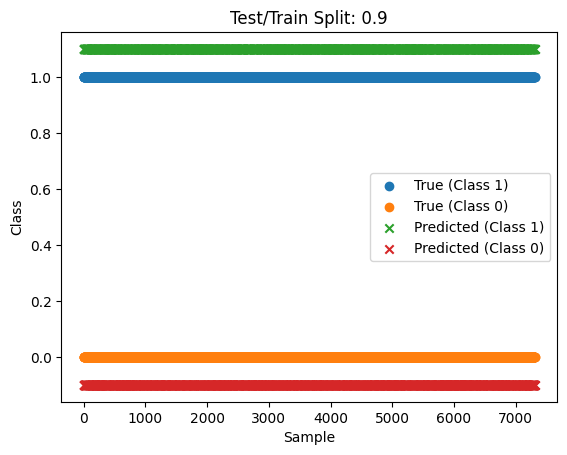

Neural Network Accuracy: 0.9975382685661316


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)

plt.figure()
true_marker = 'o'
false_marker = 'x'
plt.scatter(np.where(y_test_encoded == 1)[0], np.ones_like(np.where(y_test_encoded == 1)[0]), marker=true_marker, label='True (Class 1)')
plt.scatter(np.where(y_test_encoded == 0)[0], np.zeros_like(np.where(y_test_encoded == 0)[0]), marker=true_marker, label='True (Class 0)')
plt.scatter(np.where(y_pred_nn == 1)[0], np.ones_like(np.where(y_pred_nn == 1)[0]) + 0.1, marker=false_marker, label='Predicted (Class 1)')
plt.scatter(np.where(y_pred_nn == 0)[0], np.zeros_like(np.where(y_pred_nn == 0)[0]) - 0.1, marker=false_marker, label='Predicted (Class 0)')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title(f"Test/Train Split: {split_ratio:.1f}")
plt.legend()
plt.show()

_, accuracy_nn = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Neural Network Accuracy:", accuracy_nn)



When we have discussed the assignment, I will tell you what the data set is about, which has its origin from our nature.

Analysis of different test-train data splits 

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I decided to check for the accuracy of the model when using different test/train splits

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_homework_6.csv")

target = data['target']

data = data.drop('target', axis=1)

data_encoded = pd.get_dummies(data, drop_first=True)

splits = range(1, 10)

logreg_accuracies = []
nn_accuracies = []

for split in splits:
    split_ratio = split / 10.0

    X_train, X_test, y_train, y_test = train_test_split(data_encoded, target, test_size=split_ratio, random_state=42)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred_logreg = logreg.predict(X_test)

    accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
    logreg_accuracies.append(accuracy_logreg)

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)

    _, accuracy_nn = model.evaluate(X_test, y_test_encoded, verbose=0)
    nn_accuracies.append(accuracy_nn)

    y_pred_nn_prob = model.predict(X_test)
    y_pred_nn = np.where(y_pred_nn_prob >= 0.5, 1, 0)

for i, (logreg_acc, nn_acc) in enumerate(zip(logreg_accuracies, nn_accuracies)):
    split_ratio = (i + 1) / 10.0
    print(f"Test/Train Split: {split_ratio:.1f}")
    print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")
    print(f"Neural Network Accuracy: {nn_acc:.4f}")
    print()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
229/229 [==============================] - 1s 2ms/step - loss: 0.1575 - accuracy: 0.9523
Epoch 2/10
229/229 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9990
Epoch 3/10
229/229 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9999
Epoch 4/10
229/229 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 5/10
229/229 [==============================] - 1s 2ms/step - loss: 7.2328e-04 - accuracy: 1.0000
Epoch 6/10
229/229 [==============================] - 1s 2ms/step - loss: 4.4005e-04 - accuracy: 1.0000
Epoch 7/10
229/229 [==============================] - 1s 2ms/step - loss: 2.9296e-04 - accuracy: 1.0000
Epoch 8/10
229/229 [==============================] - 0s 2ms/step - loss: 2.0060e-04 - accuracy: 1.0000
Epoch 9/10
229/229 [==============================] - 0